# SolidMotor Class Usage


Here we explore different features of the SolidMotor class.

Let's start by importing the SolidMotor class.


In [ ]:
from rocketpy import SolidMotor

In [ ]:
# These lines are here for debugging purposes only.
%load_ext autoreload
%autoreload 2

## Thrust Source


The thrust source is of most importance when analyzing several trajectory attributes,
including the out of rail velocity, thrust to weight ratio, apogee and many others.
Let's create a new motor and take a closer look at this functionality.


### Constant Thrust


When passing an int or float, the thrust will be considered constant in time.


In [ ]:
solid_constant = SolidMotor(
    thrustSource=1500,
    dry_mass=1.815,
    dry_inertia=(0.125, 0.125, 0.002),
    center_of_dry_mass=0.317,
    grainsCenterOfMassPosition=0.397,
    burn_time=3.9,
    grainNumber=5,
    grainSeparation=5 / 1000,
    grainDensity=1815,
    grainOuterRadius=33 / 1000,
    grainInitialInnerRadius=15 / 1000,
    grainInitialHeight=120 / 1000,
    nozzleRadius=33 / 1000,
    throatRadius=11 / 1000,
    interpolationMethod="linear",
    nozzlePosition=0,
    coordinateSystemOrientation="nozzleToCombustionChamber",
)

Let's call the `info()` method to see what kind of information we get.
Alternatively, we could use the `allInfo()` method to get a more complete output.


In [ ]:
solid_constant.info()

### Thrust From Static Firings (CSV Files)


Usually one has much more precise information about the motor and wishes to
specify a directory containing a .csv file (the file shall contain no headers),
which contains thrust (Newtons) as a function of time (seconds).

That can be done as follows:


In [ ]:
solid_csv = SolidMotor(
    thrustSource=r"../../data/motors/keron/thrustCurve.csv",
    dry_mass=1.815,
    dry_inertia=(0.125, 0.125, 0.002),
    center_of_dry_mass=0.317,
    grainsCenterOfMassPosition=0.397,
    burn_time=3.9,
    grainNumber=5,
    grainSeparation=5 / 1000,
    grainDensity=1815,
    grainOuterRadius=33 / 1000,
    grainInitialInnerRadius=15 / 1000,
    grainInitialHeight=120 / 1000,
    nozzleRadius=33 / 1000,
    throatRadius=11 / 1000,
    interpolationMethod="linear",
    nozzlePosition=0,
    coordinateSystemOrientation="nozzleToCombustionChamber",
)

In [ ]:
solid_csv.info()

### Eng Files Are Also Supported! (RASP)


Most rocket motors providers share the thrust curve from their motors using the RASP file format (`.eng` files). RocketPy can import such files as the thrust source. Furthermore, if you have a thrust curve in a `.csv`file, RocketPy can also read your data and exported as a `.eng` file.


In [ ]:
solid_eng = SolidMotor(
    thrustSource="../../data/motors/Cesaroni_M1670.eng",
    dry_mass=1.815,
    dry_inertia=(0.125, 0.125, 0.002),
    center_of_dry_mass=0.317,
    grainsCenterOfMassPosition=0.397,
    burn_time=3.9,
    grainNumber=5,
    grainSeparation=5 / 1000,
    grainDensity=1815,
    grainOuterRadius=33 / 1000,
    grainInitialInnerRadius=15 / 1000,
    grainInitialHeight=120 / 1000,
    nozzleRadius=33 / 1000,
    throatRadius=11 / 1000,
    interpolationMethod="linear",
    nozzlePosition=0,
    coordinateSystemOrientation="nozzleToCombustionChamber",
)

This time we want to try the `allInfo()` to capture more details about the motor.


In [ ]:
solid_eng.allInfo()

#### One More Option...


There is also a fourth option where one specifies the thrust source parameter by passing a callable function like below.

Lambda functions are particularly useful in Python, and therefore the SolidMotor
class also supports them. Let's see how to use it.


In [21]:
solid_lambda = SolidMotor(
    thrustSource=lambda x: 1 / (x + 1),
    dry_mass=1.815,
    dry_inertia=(0.125, 0.125, 0.002),
    center_of_dry_mass=0.317,
    grainsCenterOfMassPosition=0.397,
    burn_time=3.9,
    grainNumber=5,
    grainSeparation=5 / 1000,
    grainDensity=1815,
    grainOuterRadius=33 / 1000,
    grainInitialInnerRadius=15 / 1000,
    grainInitialHeight=120 / 1000,
    nozzleRadius=33 / 1000,
    throatRadius=11 / 1000,
    interpolationMethod="linear",
    nozzlePosition=0,
    coordinateSystemOrientation="nozzleToCombustionChamber",
)


Motor Details
Total Burning Time: 3.9 s
Total Propellant Mass: 2.956 kg
Propellant Exhaust Velocity: 0.538 m/s
Average Thrust: 0.408 N
Maximum Thrust: 1.0 N at 0.0 s after ignition.
Total Impulse: 1.590 Ns

Plots


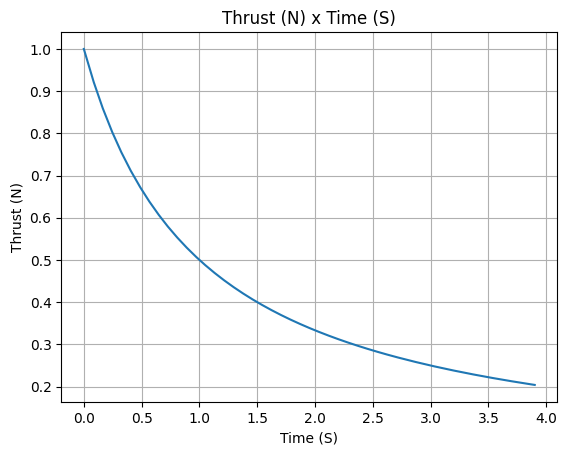

In [22]:
solid_lambda.info()

# Reshaping and interpolating the thrust curve


We know explore the reshape feature concerning the thrust curve and the interpolation method. Sometimes is useful to rescale a given curve to match new specifications when impulse and burn out time are expected to vary only slightly. That can be done how we know exemplify by setting the new burn out time in seconds to be ten and the new total impulse to be 6000 Ns.


In [25]:
solid_reshaped = SolidMotor(
    thrustSource=r"../../data/motors/keron/thrustCurve.csv",
    dry_mass=1.815,
    dry_inertia=(0.125, 0.125, 0.002),
    reshapeThrustCurve=[10, 6000],
    center_of_dry_mass=0.317,
    grainsCenterOfMassPosition=0.397,
    burn_time=3.9,
    grainNumber=5,
    grainSeparation=5 / 1000,
    grainDensity=1815,
    grainOuterRadius=33 / 1000,
    grainInitialInnerRadius=15 / 1000,
    grainInitialHeight=120 / 1000,
    nozzleRadius=33 / 1000,
    throatRadius=11 / 1000,
    interpolationMethod="linear",
    nozzlePosition=0,
    coordinateSystemOrientation="nozzleToCombustionChamber",
)

Pay close attention to the newly generated curve and be aware of the changes the rescale has produced regarding the physical quantities.


Nozzle Details
Nozzle Radius: 0.033 m
Nozzle Throat Radius: 0.011 m

Grain Details
Number of Grains: 5
Grain Spacing: 0.005 m
Grain Density: 1815 kg/m3
Grain Outer Radius: 0.033 m
Grain Inner Radius: 0.015 m
Grain Height: 0.12 m
Grain Volume: 0.000 m3
Grain Mass: 0.591 kg

Motor Details
Total Burning Time: 10.0 s
Total Propellant Mass: 2.956 kg
Average Propellant Exhaust Velocity: 2029.830 m/s
Average Thrust: 600.000 N
Maximum Thrust: 2388.940104826747 N at 2.8593098217671598 s after ignition.
Total Impulse: 6000.000 Ns

Plots


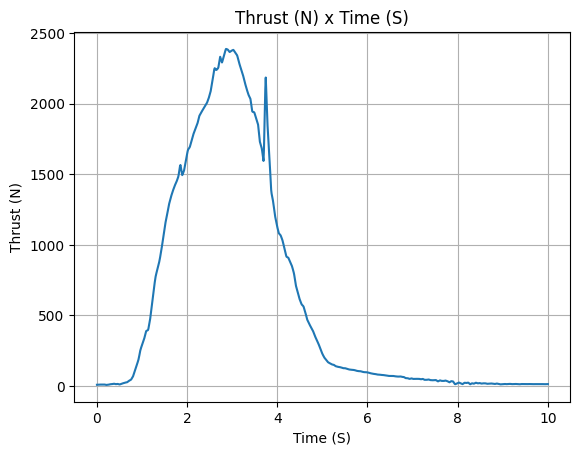

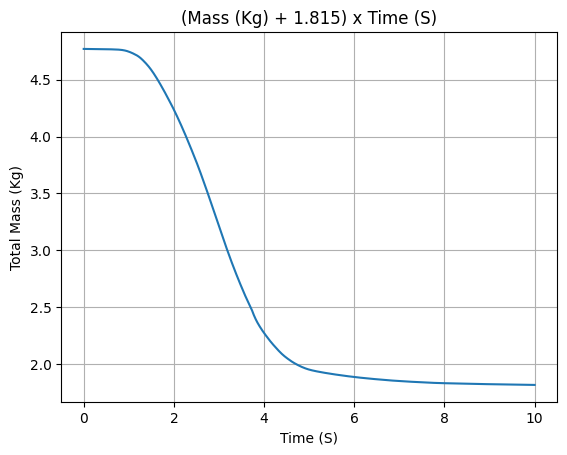

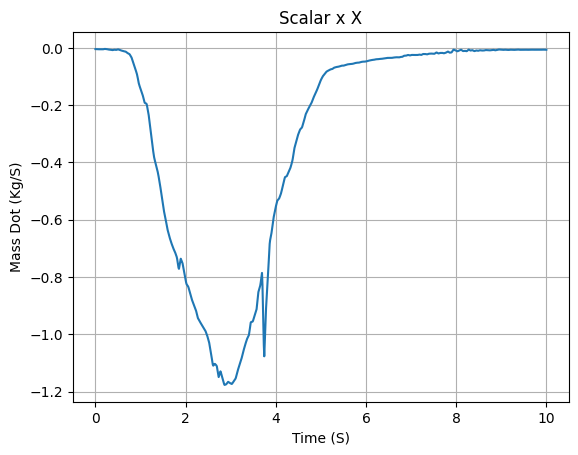

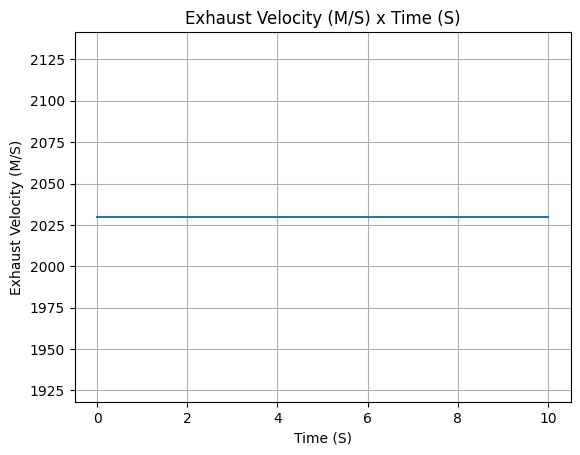

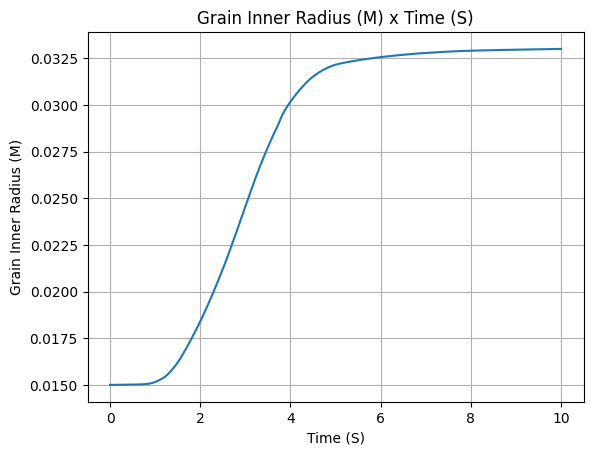

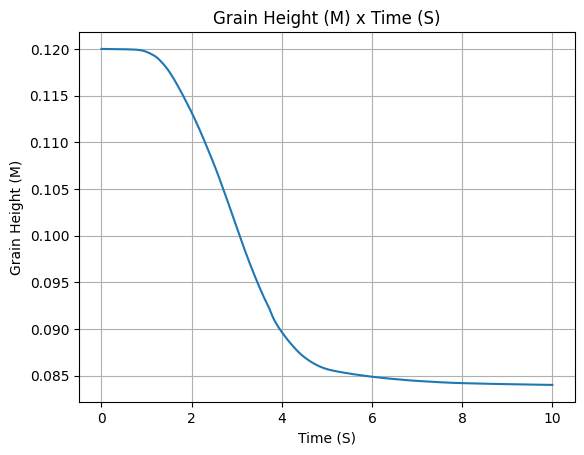

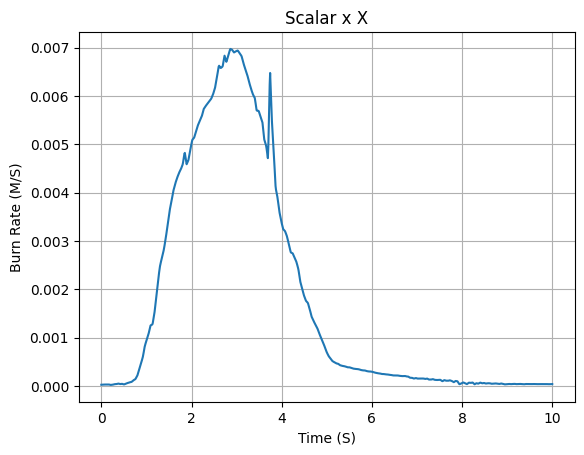

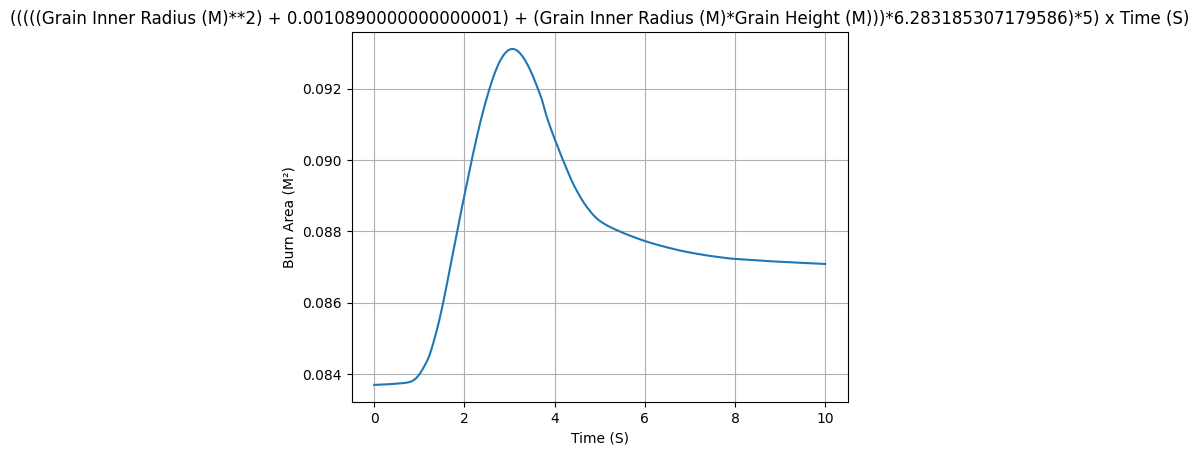

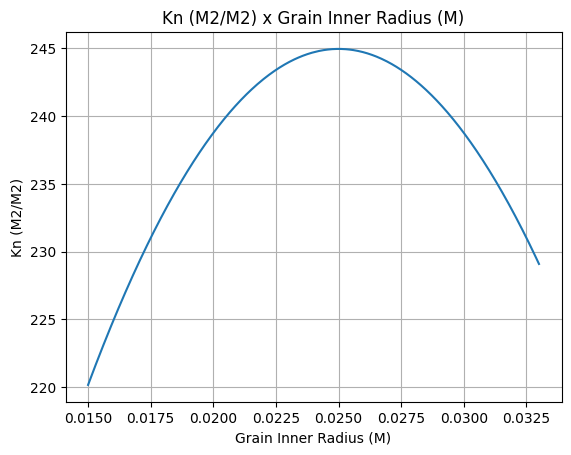

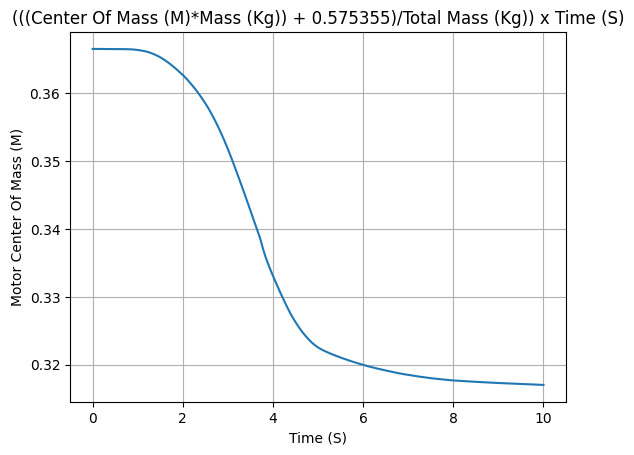

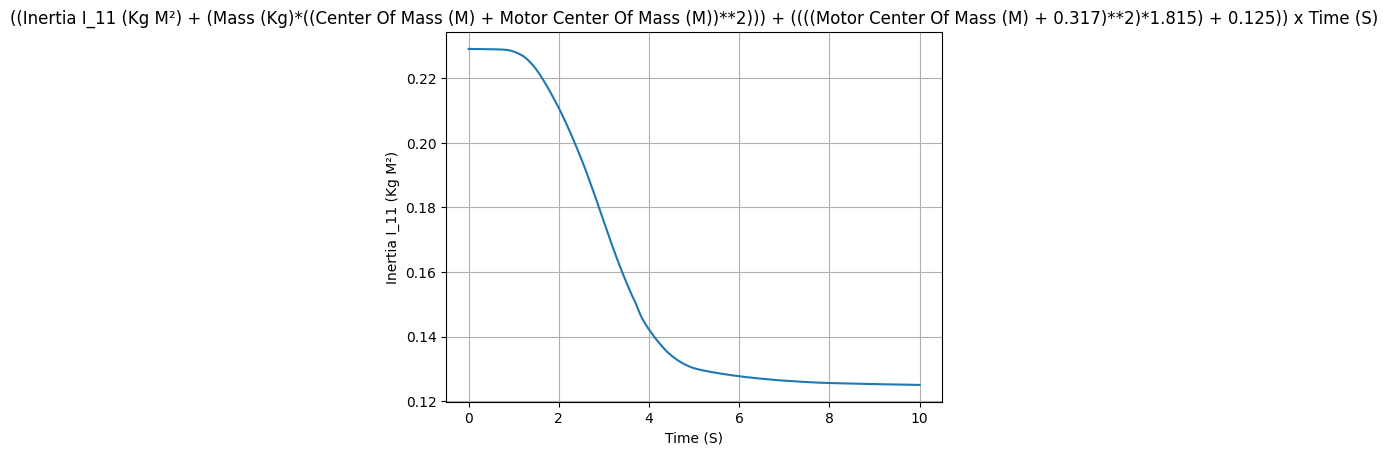

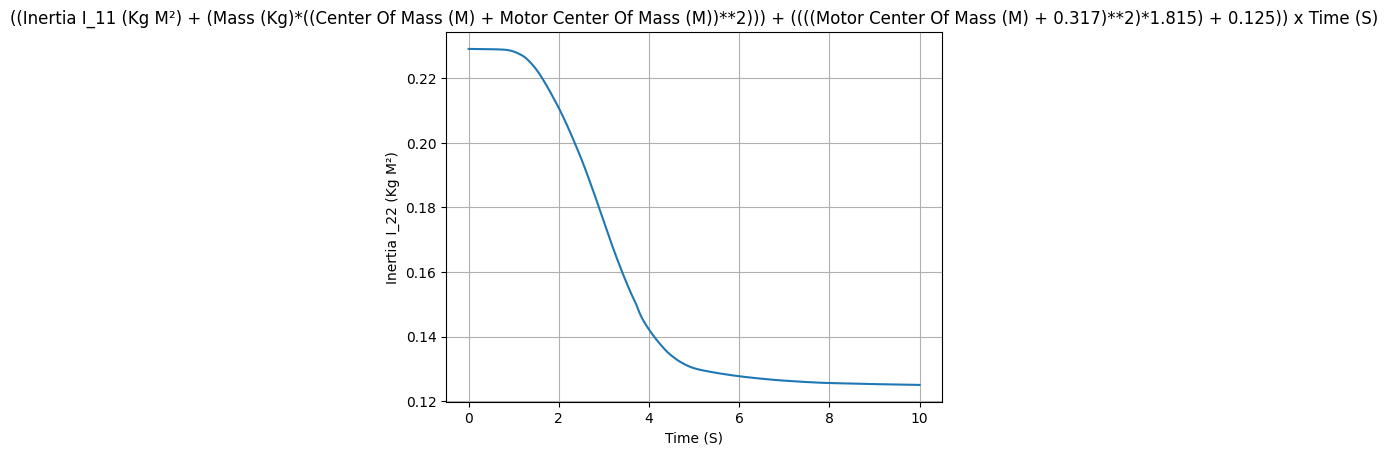

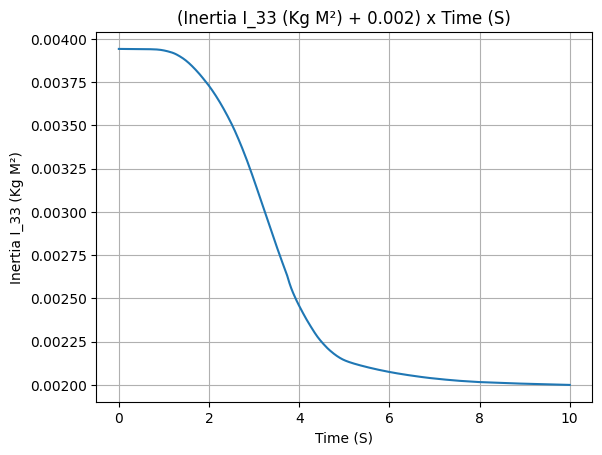

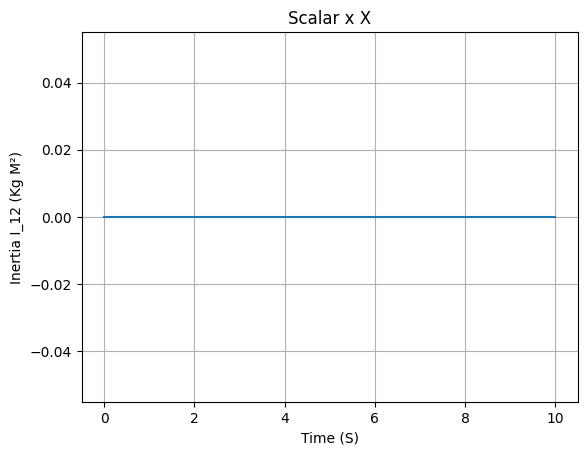

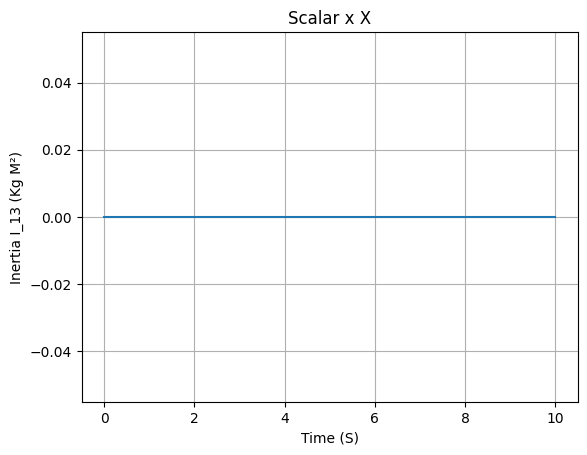

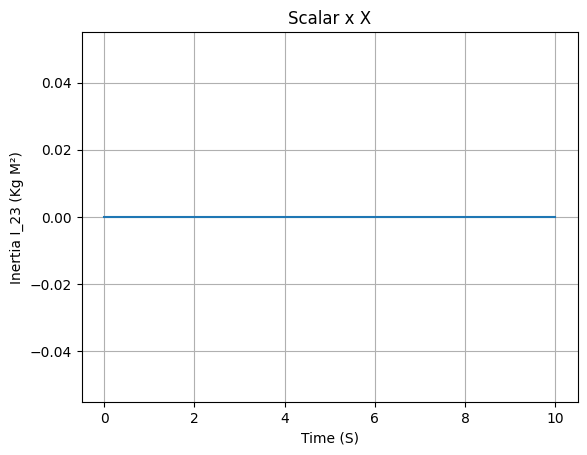

In [26]:
solid_reshaped.allInfo()

Also one is able to specify a certain interpolation method. That can be done by simply changing the 'interpolationMethod' parameter to 'spline' , 'akima' or 'linear'. Default is set to linear.


## Key Assumptions and Grain Configurations


One might wonder how some parameters were calculated and what key assumptions were made. Regarding grain configuration one should pay close attention to the fact that only BATES grain configuration is supported.


Finally, another key physical assumption is that constant exhaust velocity is assumed to be the case at all times which is in fact equivalent to saying that specific impulse is constant.
